# Майнор Интеллектуальный анализ данных / Введение в анализ данных
## Домашнее задание №4 (опциональное)
### Визуализация при обучении моделей машинного обучения

**Общая информация**

В этом задании вы вкратце пройдете цикл решения задачи анализа данных от первичного знакомства с данными до некоторого приемлемого качества решения задачи. Девиз задания - все интерпретируемо! Мы будем визуализировать результаты работы всех используемых методов из sklearn, чтобы понять, как они работают с нашими данными. Все инструменты были рассмотрены на семинарах, примеры для редких исключений приведены тут же в ноутбуке или по ссылкам.

**Срок сдачи:** 17 июня 2017, 23:59

При отправлении ДЗ на почту `hse.minor.dm+X@gmail.com` указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:
** [ИАД-X] Фамилия Имя ДЗ-4 **

Сопровождайте ваш код изображеними, комментариями и выводами.

Имейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

Большую часть задания вы будете работать с черно-белыми изображениями листьев, а в конце поработаете также с готовыми признаковыми описаниями листьев.

## 0. Загрузка данных

Скачайте данные по ссылкам: [таблица](https://drive.google.com/file/d/1LBc2YeddvEvDaCQHktJPZgJ3tZhJSGHh/view?usp=sharing) и [архив](https://drive.google.com/file/d/1cY5v5T26-_nqLkrJ6yUIVPIhCp7tulSi/view?usp=sharing) с изображениями.

Загрузим таблицу - файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [2]:
DATA_DIR = os.path.join('data')
IMG_DIR = os.path.join(DATA_DIR, 'images')

In [3]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)

In [4]:
print("Число классов: %d"%table_data.species.nunique())

Число классов: 99


In [5]:
table_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить numpy-матрицу
* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь, чтобы сгенерировать выборку с нужными пропорциями классов.

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [7]:
le = LabelEncoder()
X = table_data.drop(['species', 'id'], axis=1).values
y = le.fit_transform(table_data.species)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        train_idx = train_index
        test_idx = test_index

Теперь загрузим картинки. В папке `images` лежат 1584 изображения в градациях серого различного размера.

In [8]:
# попробуем загрузить 1 изображение
filepath = os.path.join(IMG_DIR, '33.jpg')
img = plt.imread(filepath)

(357, 700)


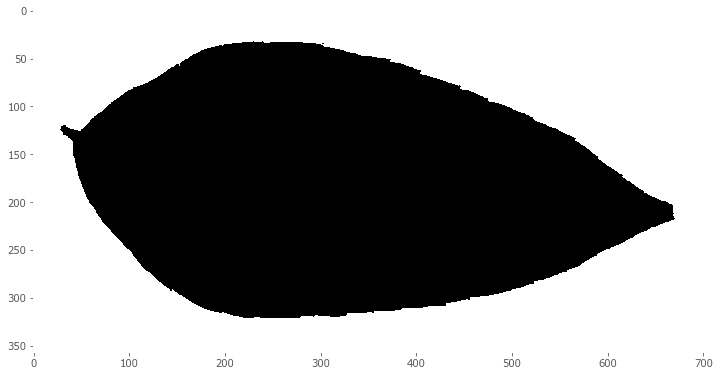

In [9]:
print(img.shape)
plt.imshow(img, cmap='Greys')
plt.grid(None)

Все изображения имеют разный размер, будем приводить их к размеру 100x100 с помощью функции scipy.misc.imresiz:

In [10]:
from skimage.transform import resize

In [11]:
img_resized = resize(img, (100, 100), mode='reflect')

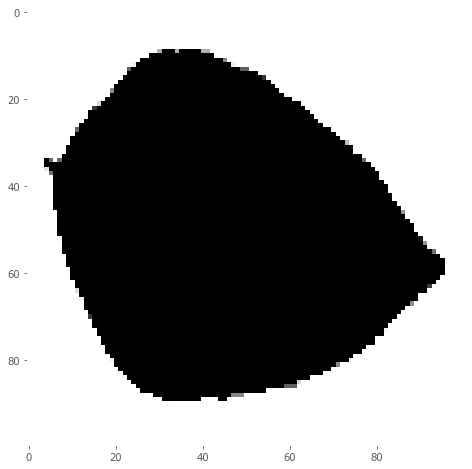

In [12]:
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балл)
Загрузите все изображения листьев, отмасштабируйте, вытяните в вектор длины 10000 (np.ravel) и запишите их в массив размера (число изображений) x 10000. Сделайте два массива - с обучающими и контрольными картинками (останутся только не картинки, которые встречались в табличных данных), назовите их imgs_train и imgs_test. В итоге мы превратим картинки в попиксельные признаковые описания объектов-листьев.

In [13]:
image_list = []
for file_number in range(1, len(os.listdir(IMG_DIR))+1): # listdir как итератор нам не подходит, т.к сортирует пути к
                                                         # файлам по умолчанию не так, как нам надо
    filename = os.path.join(IMG_DIR, str(file_number) + '.jpg')
    im=plt.imread(filename)
    img_resized = resize(im, (100, 100), mode='reflect')
    img_resized = np.ravel(img_resized)
    image_list.append(img_resized)

In [14]:
image_list = np.array(image_list)
imgs_train = np.take(image_list, table_data.iloc[train_idx].id.values - 1,axis=0)
imgs_test = np.take(image_list, table_data.iloc[test_idx].id.values - 1,axis=0)

## 1. Visualization
Начнем с простой визуализации наших данных. Вам понадобится рисовать несколько картинок на одной - в виде таблицы. Это делается с помощью plt.subplot. Например, нарисуем 25 степенных функций:

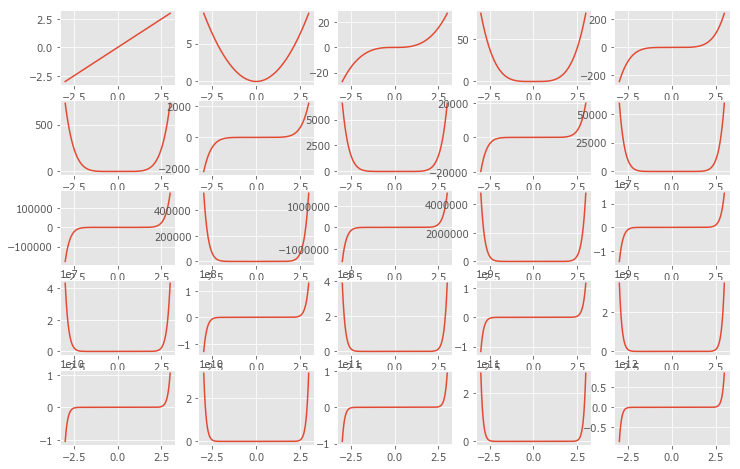

In [15]:
xs = np.linspace(-3, 3, 1000)
for i in range(1, 26): # числа от 1 до 25
    plt.subplot(5, 5, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
                         # третье - номер текущей картинки, если ситать слева направо, сверху вниз
    plt.plot(xs, xs**i)
    # plt.axis("off") # отключить оси, получится просто 25 линий

Кроме того, вам понадобится рисовать гистограммы. Это делается с помощью plt.hist:

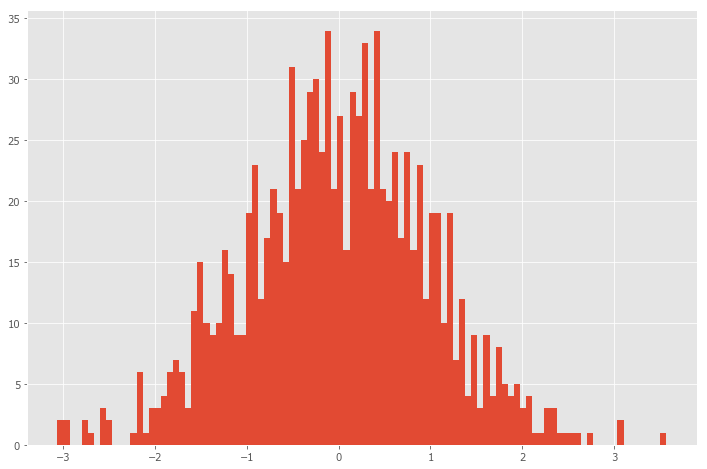

In [16]:
sample = np.random.normal(size=1000) # гистограмма строится по одномерной выборке - вектору чисел
_ = plt.hist(sample, bins=100) # то, что возвращает функция, сохранять никуда не нужно. bins=100 - число столбиков.

По гистограмме видно, какие значения наиболее популярны, какие - менее.

### Простая визуализация (0.5 балла код + 0.5 балла выводы)
* Нарисуйте в табличке 10x10 99 изображений листьев - по одному каждого класса (одна ячейка таблицы останется пустой)
* Нарисуйте в табличке 10x10 100 гистограмм значений случайно выбранных пикселей (берем значние пикселя на всех картинках и составляем из них вектор, используйте векторизацию)
* Нарисуйте 1 картинку - "средний лист". Просто усредните все пиксели по изображениям. Затем нарисуйте еще 1 картинку - разброс каждого пикселя (насколько он отклоняется от среднего). Для этого воспользуйтесь функцией np.std

Все пункты выполняйте с использованием обучающей выборки (у нас данные однородны).

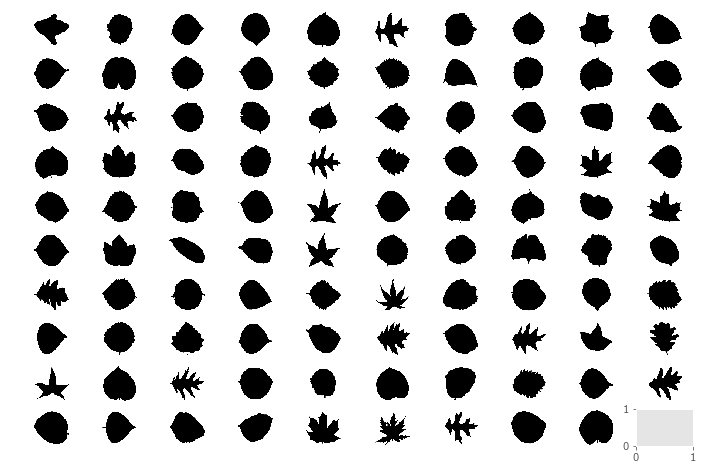

In [17]:
species_dict = dict()
for category_idx, category in enumerate(y_test): # достаем из каждого класса по одной категории
    species_dict[category] = test_idx[category_idx]

for i in range(1, 101):
    plt.subplot(10, 10, i)
    if i!=100:
        img = np.resize(image_list[species_dict[i-1]], (100,100))
        plt.imshow(img, cmap='Greys')
        plt.grid(None)
        plt.axis('off')

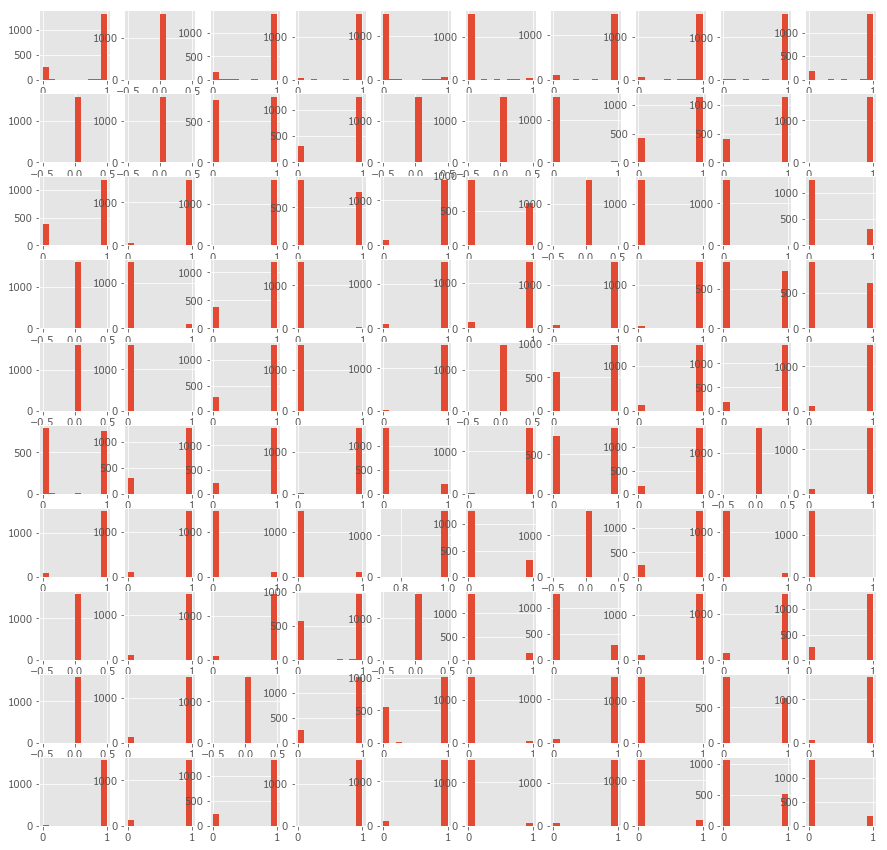

In [18]:
np.random.seed(0)
column_indices = np.random.randint(0,10000, size=100) # Случайный выбор пикселей

plt.figure(figsize=(15,15))
for i, column_idx in enumerate(column_indices):
    plt.subplot(10, 10, i+1)
    plt.hist(image_list[:,column_idx])

In [19]:
mean_leaf = np.resize(np.mean(image_list, axis=0), (100,100)) # "Средний лист"
std_leaf = np.resize(np.std(image_list, axis=0), (100,100)) # Стандартные отклонения пикселей

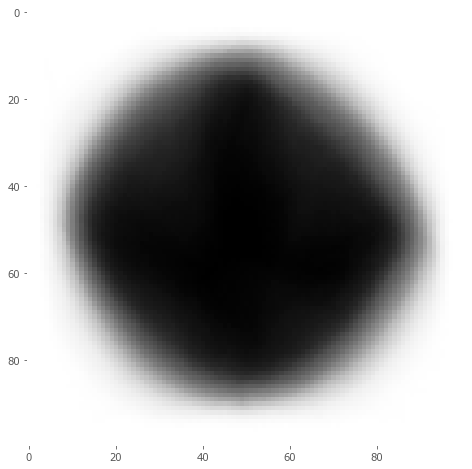

In [20]:
plt.imshow(mean_leaf, cmap='Greys')
plt.grid(None)

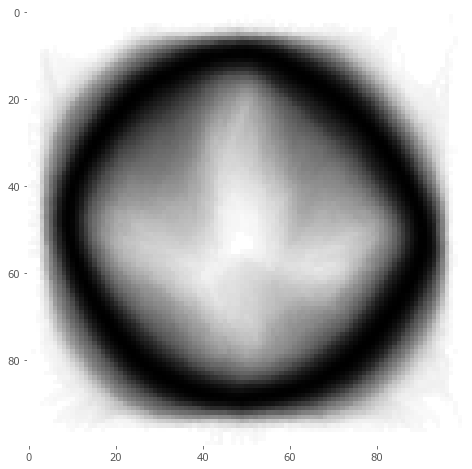

In [21]:
plt.imshow(std_leaf, cmap='Greys')
plt.grid(None)

Ответьте на вопросы:
* Можно ли отличить листья разных классов визуально? Можете ли вы выделить группы похожих классов?
* Каковы минимальное/максимальное значения признаков? Какого множество значений признаков? Какие значения чаще всего принимают признаки? Похожи ли распределения разных признаков между собой?
* Можно ли бинаризовать изображения (чтобы каждый пиксель принимал значение 0 или 1) без сильной потери информации? Почему вы так думаете? По какому порогу лучше бинаризовать?
* Похож ли "средний лист" на обычный лист? Как вы думаете, почему? Много ли пикселей, которые всегда принимают одно и то же значение (константный признак)? 

**Ответы:**

* Да, визуально некоторые листья различимы. Я бы выделил 3 группы похожих классов листьев: цельные листья, которые являются почти круглыми и не имеют никаких вырезов; листья, у которых много вырезов и длинные тонкие окончания; и листья, у которых вырезов не особо много и небольшое количество довольно обширных окончаний (3-5), вроде кленового листа. Помимо этого видно "звездообразные листья", но я не уверен, стоит ли их выделять в отдельную группу.
* Минимальное значение - 0, максимальное - 1. Множество значений признаков: действительные числа из отрезка [0;1]. Чаще всегоо признаки принимают значения 0 или 1. Да, распределения разных признаков похожи - почти вся плотность распологается на концах отрезка [0;1], между крайними значениями почти ничего нет.
* Да, можно, многие значения пикселей целочисленные, и следовательно при бинаризации общая картина никак не поменяется - основная часть значений останется такой же, поменяются лишь пиксели на нескольких картинках, часть которых от общего размера датасета, невелика. Бинаризовать лучше по порогу 0.45-0.5,т.к около центра тяжести распределение примерно одинаковое.
* Можно разглядеть некоторые признаки обычного листа (что-то вроде кленового листа), но в целом что-то увидеть трудно. Думаю, это связано с тем, что виды листов очень отличаются, и, допустим, круглые листы делают "средний лист" большим черным пятном, но при этом листы с разрезами также оставляют свой отпечаток, делая изображение белее в тех местах, где у них эти разрезы. Да, по центру много пикселей, которые всегда черные, т.к там пересекаются все виды листков. По краям изображения уже видна сильная разница, и значения пикселей там отличаются

### Понижение размерности (0.5 балла код + 0.5 балла выводы)
* Запустите t-SNE на обучающей выборке (если долго считается, берите меньше объектов) и визуализируйте с цветовым указанием классов. Выведите легенду цветов.
* Затем повторите предыдущий шаг с треми различными параметрами [расстояния Минковского](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.minkowski.html): p=2 (это евклидово расстояние, оно установлено по умолчанию), p=1 и p=np.infty. 

In [22]:
table_data['label'] = y

In [23]:
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_scaled = scale(X)
X_embedded = tsne.fit_transform(X_scaled)

table_data['X_tsne'] = X_embedded[:,0]
table_data['y_tsne'] = X_embedded[:,1]

** Извиняюсь за поехавшую легенду на графиках, я не нашел способа сделать legend box нормальной по размерам **

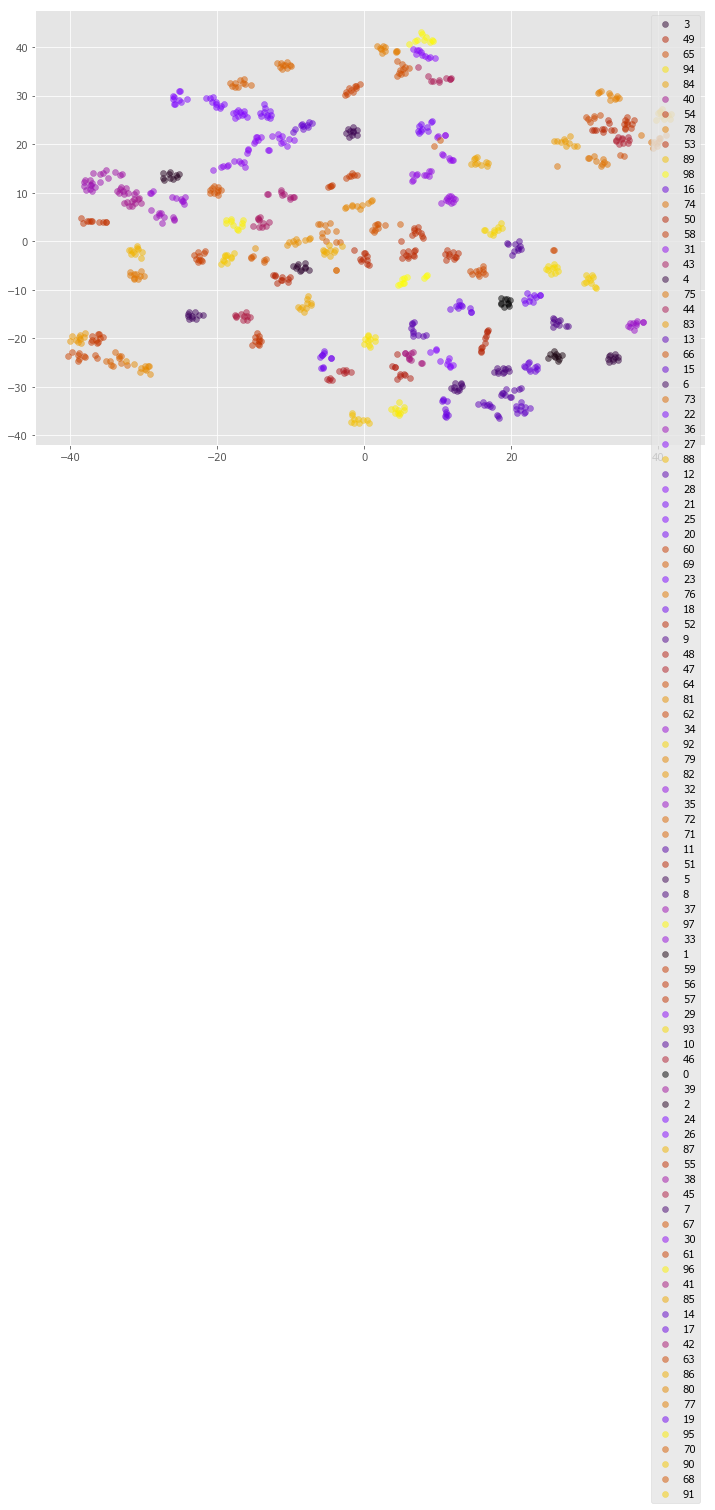

In [24]:
unique = table_data['label'].unique()
colors = [plt.cm.gnuplot(float(i)/max(unique)) for i in unique]
for label_idx, label in enumerate(unique):
    slice_table = table_data[table_data['label'] == label]
    plt.scatter(slice_table['X_tsne'], slice_table['y_tsne'], alpha=0.5, c=colors[label_idx], label=str(label))

plt.legend()

In [25]:
from scipy.spatial.distance import minkowski

In [26]:
tsne = TSNE(n_components=2, metric= lambda u,v: minkowski(u,v, p=1), random_state=0) # p1-метрика
X_embedded = tsne.fit_transform(X_scaled)

table_data['X_tsne'] = X_embedded[:,0]
table_data['y_tsne'] = X_embedded[:,1]

Text(0.5,1,'TSNE with p=1')

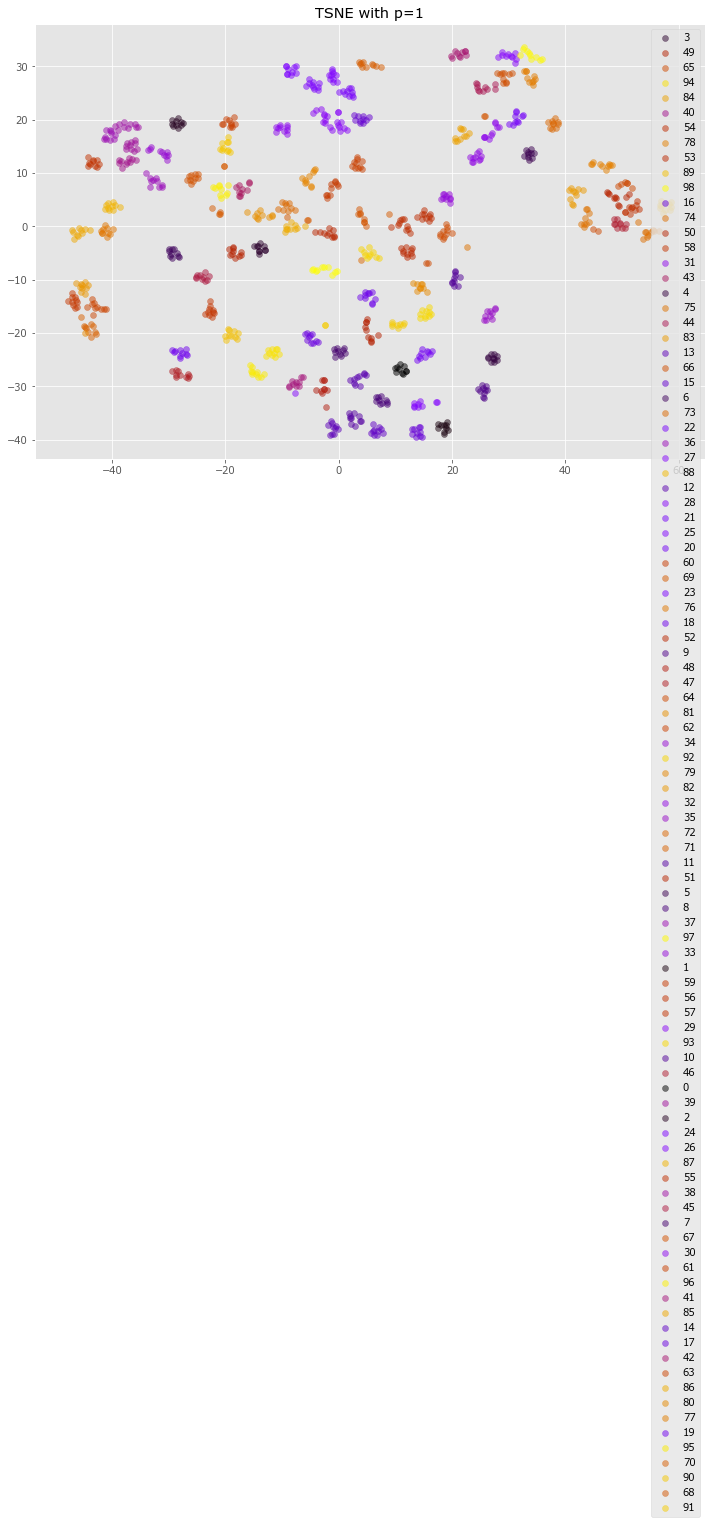

In [27]:
unique = table_data['label'].unique()
colors = [plt.cm.gnuplot(float(i)/max(unique)) for i in unique]
for label_idx, label in enumerate(unique):
    slice_table = table_data[table_data['label'] == label]
    plt.scatter(slice_table['X_tsne'], slice_table['y_tsne'], alpha=0.5, c=colors[label_idx], label=str(label))

plt.legend(loc=1);
plt.title("TSNE with p=1")

In [28]:
tsne = TSNE(n_components=2, metric= lambda u,v: minkowski(u,v, p=2), random_state=0) # p2-метрика
X_embedded = tsne.fit_transform(X_scaled)

table_data['X_tsne'] = X_embedded[:,0]
table_data['y_tsne'] = X_embedded[:,1]

Text(0.5,1,'TSNE with p=2')

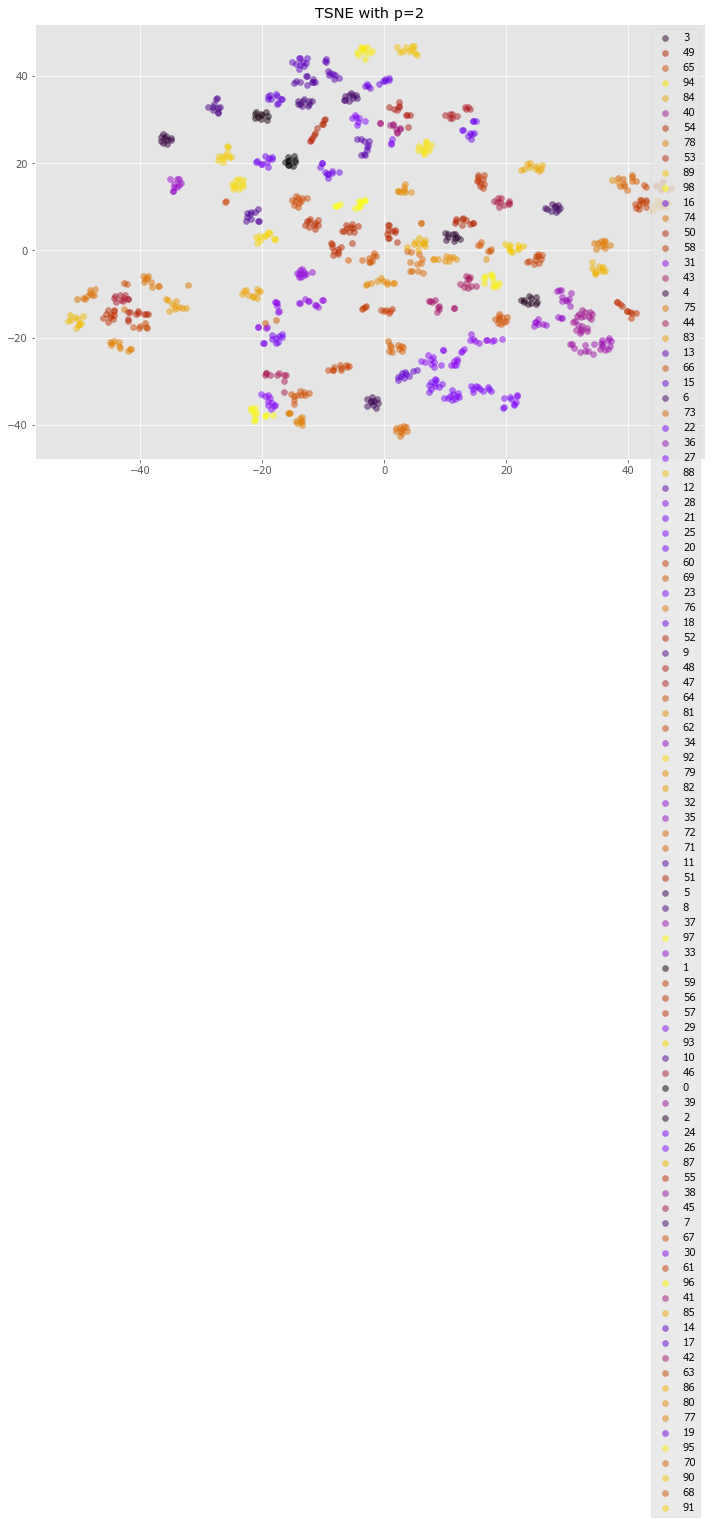

In [29]:
unique = table_data['label'].unique()
colors = [plt.cm.gnuplot(float(i)/max(unique)) for i in unique]
for label_idx, label in enumerate(unique):
    slice_table = table_data[table_data['label'] == label]
    plt.scatter(slice_table['X_tsne'], slice_table['y_tsne'], alpha=0.5, c=colors[label_idx], label=str(label))

plt.legend(loc=1);
plt.title("TSNE with p=2")

In [30]:
tsne = TSNE(n_components=2, metric= lambda u,v: minkowski(u,v, p=np.infty), random_state=0) # pinf-метрика
X_embedded = tsne.fit_transform(X_scaled)

table_data['X_tsne'] = X_embedded[:,0]
table_data['y_tsne'] = X_embedded[:,1]

Text(0.5,1,'TSNE with p=$\\infty$')

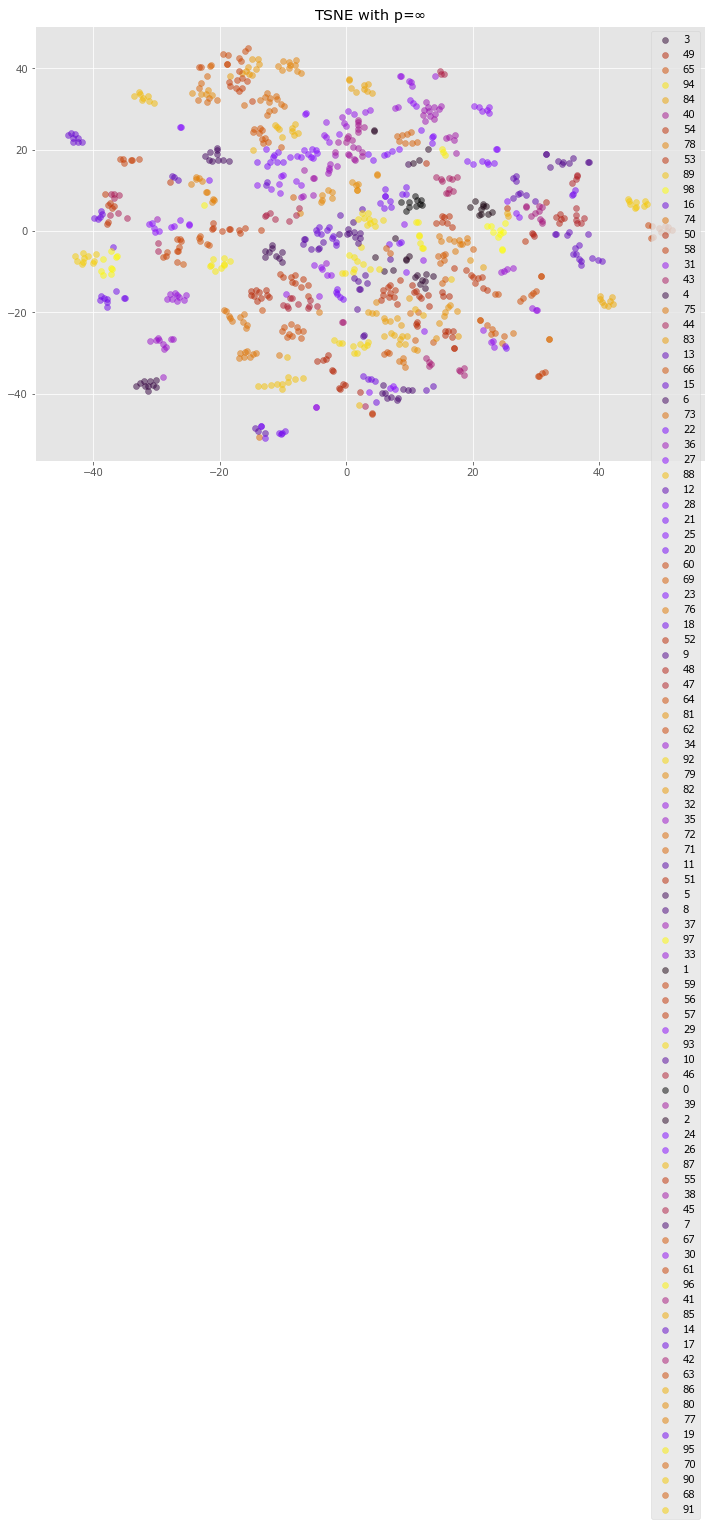

In [31]:
unique = table_data['label'].unique()
colors = [plt.cm.gnuplot(float(i)/max(unique)) for i in unique]
for label_idx, label in enumerate(unique):
    slice_table = table_data[table_data['label'] == label]
    plt.scatter(slice_table['X_tsne'], slice_table['y_tsne'], alpha=0.5, c=colors[label_idx], label=str(label))

plt.legend(loc=1);
plt.title("TSNE with p=$\infty$")

Ответьте на вопросы:
* Хорошо ли разделяются классы на визуализации? 
* Можно ли выделить группы похожих классов по визуализации? Если да, то похожи ли они на те, которые вы выделяли в предыдущей секции вопросов?
* С каким параметром расстояния Минковского визуализация получается лучше всего? Предположите, почему (для этого надо разобраться, как работает расстояние с p=1 и p=бесконечность применительно к картинкам)

**Ответы:**
* Да, многие классы хорошо разделяются.
* Можно выделить оранжево-красную, фиолетовую и темно-фиолетовые группы. Оранжевая группа - да, похожа на группу листьев с вырезами (классы 49,65). Светло-фиолетовые - трудно сказать, это просто круглые бесофрменные листы (24, 26, 29). Темно-фиолетовые(34,40) - то же самое.
* С p=1. Предполагаю, это связано с тем, как при разных метрикаъ учитывается количество ближайших соседей в t-SNE. Можно заметить, что при p=1 многие кластеры "сжимаются к нулю". Насколько я могу судить, при проекции из многомерных пространств t-SNE учитывает локальную структуру данных и "схлопывает" скопления точек в кластеры, если какие-то их координаты по конкретным осям расположены рядом (при p=1).

## 2. Exploration
Теперь попробуем разобраться с внутренней структурой наших данных: применим к ним кластеризацию. Ограничимся самым простым методом - KMeans.

### Понижение размерности (0.5 балла код + 0.5 балла выводы)
* Выполните кластеризацию листьев с помощью KMeans на 9 кластеров. Метрика по умолчанию.
* Как вы знаете, у каждого кластера в KMeans есть центр - вектор той же размерности, что и объекты. Визуализируйте центры кластеров (переменная cluster\_centers\_ - то же самое, что centers в семинаре) в виде изображений 100x100, оформите их табицей 3x3.
* Повторите предыдущие действия для 25 и 100 кластеров.

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(9, n_jobs=-1, random_state=0).fit(image_list)



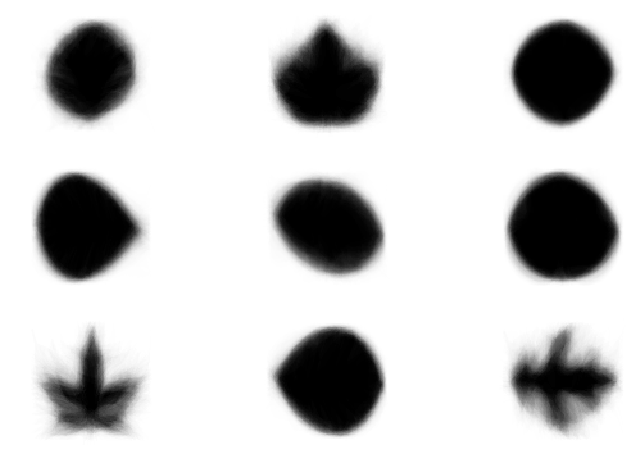

In [33]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    img = np.resize(kmeans.cluster_centers_[i-1], (100,100))
    plt.imshow(img, cmap='Greys')
    plt.grid(None)
    plt.axis('off')

In [34]:
kmeans = KMeans(25, n_jobs=-1, random_state=0).fit(image_list)

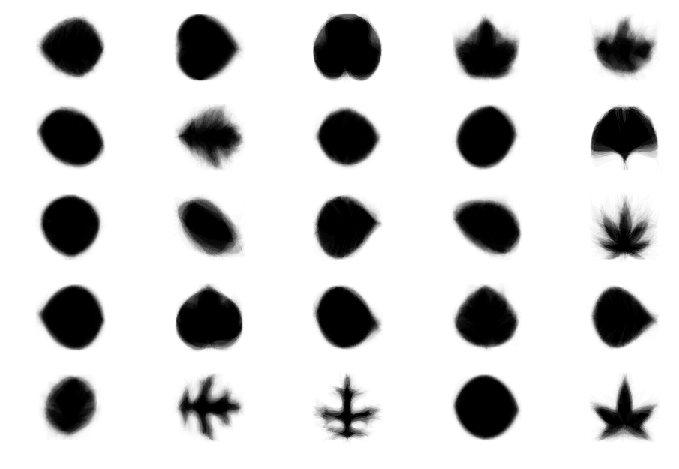

In [35]:
for i in range(1, 26):
    plt.subplot(5, 5, i)
    img = np.resize(kmeans.cluster_centers_[i-1], (100,100))
    plt.imshow(img, cmap='Greys')
    plt.grid(None)
    plt.axis('off')

In [36]:
kmeans = KMeans(100, n_jobs=-1, random_state=0).fit(image_list)

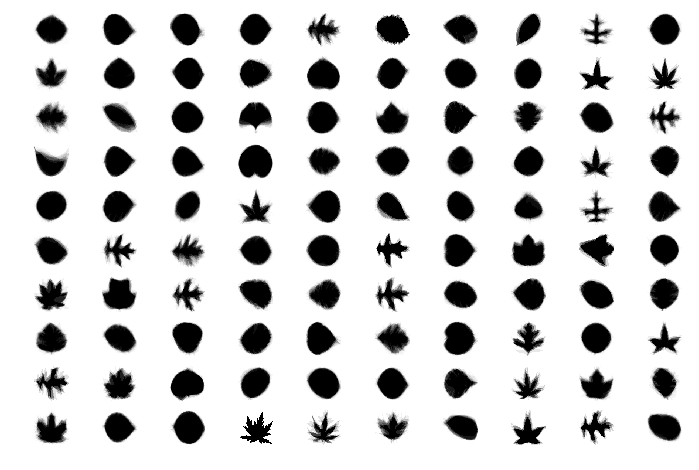

In [37]:
for i in range(1, 101):
    plt.subplot(10, 10, i)
    img = np.resize(kmeans.cluster_centers_[i-1], (100,100))
    plt.imshow(img, cmap='Greys')
    plt.grid(None)
    plt.axis('off')

Ответьте на вопросы:
* Похожи ли центры кластеров на листья?
* В чем отличие от картинок листьев? В чем причина этого отличия?
* Есть ли среди кластеров похожие (или повторяющиеся)? 
* Какое, по вашему мнению, количество кластеров лучше всего подходит под эти данные? Почему?

**Ответы**
* Да, очень сильно похожи.
* Отличие в "замыленности картинки". Причина в том, что создается шум в пикселях из-за тех классов листьев, которые не принадлежат к данному классу, но все равно находятся в пространстве рядом с ним.
* Есть. Особенно много повторяющихся кластеров в тех случаях, когда их 100 штук.
* Мне кажется, 9 кластеров достаточно. Хотя в этом случае и появляется некоторая избыточность (пара кластеров практически принадлежат к одному классу), такое количество кластеров позволяет охватить почти все категории листьев. Если увеличить количество кластеров, очень многие центры будут просто повторяться.

__Бонус 1 (1 доп. балл)__

Повторите кластеризацию с другими метриками, рассмотренными в разделе Визуализация. Отличаются ли результаты? В этом задании нужно использовать любой другой метод кластеризации, который поддерживает использование различных метрик.

## 3. Prediction
Перейдем к решению задачи предсказания.

### 3 классификатора (0.5 балла код + 0.5 балла выводы)
Настройте 3 классификатора и выполните их визуализацию.
* Начнем с примитивного метрического классификатора - [центроидного](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html). Он использует идеи k-Means для решения задачи классификации: для каждого класса находит его центр (усреднением) - это обучение, а затем на этапе предсказания относит объект к тому классу, к центру которого он ближе. Настройте классификатор с гиперпараметрами по умолчанию на обучающей выборке. Выведите качество предсказания (accuracy) на контрольной выборке.
* Теперь по аналогии с KMeans визуализируйте центры классов - нарисуйте 99 изображений.
* Второй классификатор - наивный байесовский. Мы не рассматривали его в курсе, но про него можно почитать в [документации sklearn](http://scikit-learn.org/stable/modules/naive_bayes.html). Мы знаем, что наши признаки принимаю целочисленные значения, поэтому для описания признаков подойдет мультиномиальное распределение. Настройте MultinomialNB для наших данных, выведите качество на контрольных данных.
* У MultinomialNB после обучения появляется параметр feature\_log\_prob_ - это оцененный по данным логарифм вероятности $P(x_i|y)$. Визуализируйте эту матрицу в виде изображений 100x100 по аналогии с предыдущим классификатором.
* Третий классификатор - линейный. Настройте LogisticRegression и выведите качество на контрольной выборке.
* Отобразите веса для каждого класса в виде картинки 100x100.

In [38]:
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [39]:
nc = NearestCentroid()
nc.fit(imgs_train, y_train)
print("Accuracy: ", accuracy_score(y_test, nc.predict(imgs_test)))

Accuracy:  0.5909090909090909


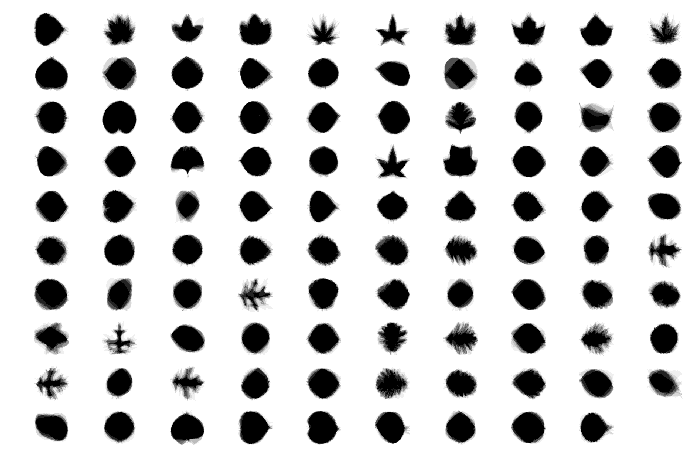

In [40]:
for i in range(1, 101):
    if i!=100:
        plt.subplot(10, 10, i)
        img = np.resize(nc.centroids_[i-1], (100,100))
        plt.imshow(img, cmap='Greys')
        plt.grid(None)
        plt.axis('off')

In [41]:
nb = MultinomialNB()
nb.fit(imgs_train, y_train)
print("Accuracy: ", accuracy_score(y_test, nb.predict(imgs_test)))

Accuracy:  0.5252525252525253


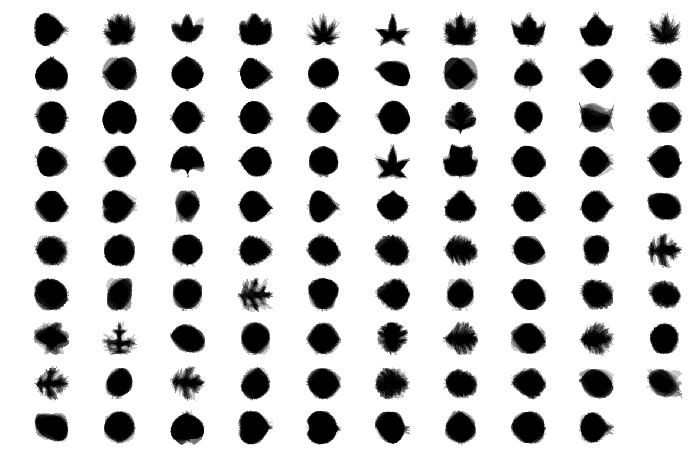

In [42]:
for i in range(1, 101):
    if i!=100:
        plt.subplot(10, 10, i)
        img = np.resize(nb.feature_log_prob_[i-1], (100,100))
        plt.imshow(img, cmap='Greys')
        plt.grid(None)
        plt.axis('off')

In [43]:
lr = LogisticRegression(random_state=0)
lr.fit(imgs_train, y_train)
print("Accuracy: ", accuracy_score(y_test, lr.predict(imgs_test)))

Accuracy:  0.5858585858585859


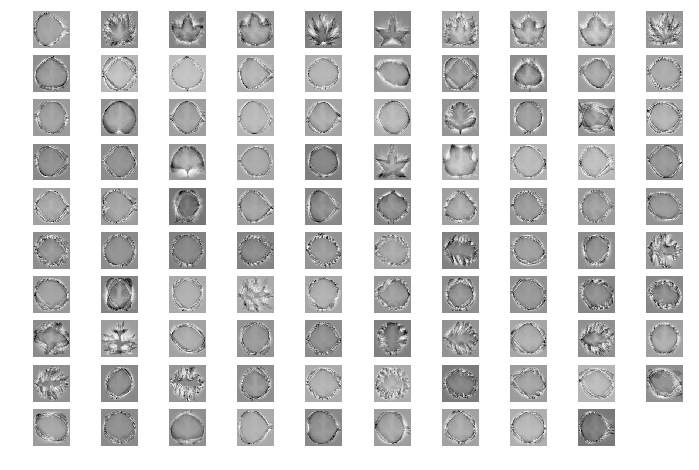

In [44]:
for i in range(1, 101):
    if i!=100:
        plt.subplot(10, 10, i)
        img = np.resize(lr.coef_[i-1], (100,100))
        plt.imshow(img, cmap='Greys')
        plt.grid(None)
        plt.axis('off')

Ответьте на вопросы:
* Какой классификатор работает лучше? Предположите, почему.
* Похожи ли центры кластеров на исходные изображения листьев? А визуализированные вероятности? А веса?
* Как вы думаете, почему картинки весов линейного классификатора отличаются от остальных визуализаций?

**Ответы:**

* Лучше всего работает центроидный классификатор. Как мне кажется, это связано с тем, что в этом датасете видны проявления гипотезы компактности, то есть похожие листы лежат в пространстве близко друг к другу, и при использовании метрических методов мы получаем наилучший результат, т.к ближайшими соседями часто являются листья того же класса. Впрочем, на всех классификаторах доля верных ответов не очень высокая.
* Центры классов и вероятности похож, а линейный классификатор выдает иную картину.
* Мне кажется это связано с тем, что при визуализации весов линейного классификатора мы видим не сами пиксели, представляющие изображения, а лишь коэффициенты, с которыми они должны пойти в линейную комбинацию. Таким образом, тут мы скорее визуализируем некие паттерны в листьях, а не сами листья.

### Случайный лес (0.25 балла код + 0.25 балла выводы)
* Настройте случайный лес на наших данных. Выведите качество на контроле.
* Отобразите feature\_importances\_ в виде картинки 100x100.

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(imgs_train, y_train)
print("Accuracy: ", accuracy_score(y_test, rf.predict(imgs_test)))

Accuracy:  0.41414141414141414


(-0.5, 99.5, 99.5, -0.5)

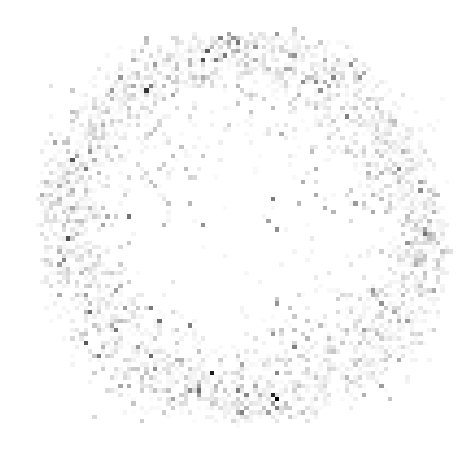

In [46]:
img = np.resize(rf.feature_importances_, (100,100))
plt.imshow(img, cmap='Greys')
plt.grid(None)
plt.axis('off')

Ответьте на вопросы:
* похожа ли картинка на изображение листа?
* соответствует ли картинка здравому смыслу? Можно ли сказать, что участки картинки, которые RF определил как неважные, действительно не помогают определить класс листа? Ответить на вопрос поможет сопоставление с изображением разброса каждого признака по выборке (см. раздел Простая визуализация, последний пункт).

**Ответы:**

* Нет, не похожа.
* Да, соответствует. Случайный лес распознал константные пиксели - которые являются черными на всех изображениях, и выделил область вокруг центра листа. Эта область действительно помогает отличить круглые цельные листья от листьев с различными изрезами.

### Другой наивный байесовский классификатор (0.25 балла код + 0.25 балла выводы)
* В разделе Простая визуализаия вы придумали порог, по которому можно бинаризовать картинки. Выполните эту бинаризацию и настройте BernoulliNB, выведите качество на контроле.
* Визуализируйте вероятности.

In [47]:
imgs_train_binarized = imgs_train
imgs_test_binarized = imgs_test

imgs_train_binarized[imgs_train>=0.47] = 1
imgs_train_binarized[imgs_train<0.47] = 0

imgs_test_binarized[imgs_test>=0.47] = 1
imgs_test_binarized[imgs_test<0.47] = 0

In [48]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(imgs_train_binarized, y_train)
print("Accuracy: ", accuracy_score(y_test, bernoulli_nb.predict(imgs_test_binarized)))

Accuracy:  0.5757575757575758


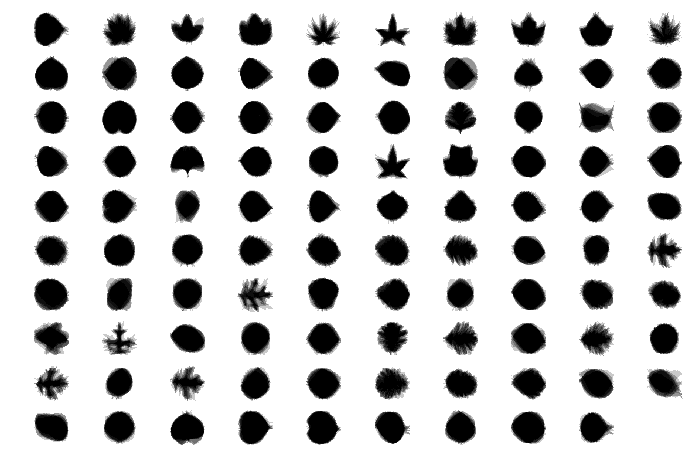

In [49]:
for i in range(1, 101):
    if i!=100:
        plt.subplot(10, 10, i)
        img = np.resize(bernoulli_nb.feature_log_prob_[i-1], (100,100))
        plt.imshow(img, cmap='Greys')
        plt.grid(None)
        plt.axis('off')

Ответьте на вопросы:
* Улучшилось на качество классификации по сравнению с MultinomialNB? Как вы думаете, почему?
* Похожи ли картинки на листья?

**Ответы:**

* Да, улучшилось. Думаю, это связано с тем, что при бинаризации данных мы избавляемся от большого количества шума в пискелях. В связи с большим количеством нулей и единиц, исходное распределение довольно неплохо описывается биномиальным, но из-за предположения о независимости пикселей мы теряем много информации.
* Да, похожи, только с некоторым замылением.

## 4. Feature engeneering and selection

Попробовали методы - надо попробовать новые признаки.

### Понижение размерности + RF (0.5 балла код + 0.5 балла выводы)
Сейчас наши данные имеют высокую размерность признакового описания - 10000. А надо ли столько много? Не окажется ли, что реально вся информация может быть записана в гораздо меньшее количество признаков?
* Для всех значений числа компонент в num_components обучите PCA с такой размерностью и на этих признаках обучите случайный лес. Запишите в отдельные массивы качество на обучении и качество на контроле. 
* Для RF на исходных признаках выведите качество и на контроле, и на обучении.
* На одной картинке постройте три графика: по оси x - число компонент, по оси ординат - качество; первый график - качество на обуении, второй - качество на контроле, третий - горизонтальная прямая (качество на контроле на исходных признаках).

_Примечание._ Чтобы построить 3 графика на одной картинке, просто используйте plt.plot(xs, ys) три раза подряд. После этого вставьте строку plt.xscale("log"), чтобы масштаб по оси абсцисс был логарифмическим.

In [50]:
num_components = 2**np.arange(10)
from sklearn.decomposition import PCA

In [51]:
accuracy_train = []
accuracy_test = []
for n in num_components:
    pca = PCA(n,random_state=0)
    imgs_train_transformed = pca.fit_transform(imgs_train)
    imgs_test_transformed = pca.transform(imgs_test)
    rf = RandomForestClassifier(random_state=0)
    rf.fit(imgs_train_transformed, y_train)
    accuracy_train.append(accuracy_score(y_train, rf.predict(imgs_train_transformed)))
    accuracy_test.append(accuracy_score(y_test, rf.predict(imgs_test_transformed)))
rf = RandomForestClassifier()
rf.fit(imgs_train, y_train)
print("Original accuracy train: ", accuracy_score(y_train, rf.predict(imgs_train)))
print("Original accuracy test: ", accuracy_score(y_test, rf.predict(imgs_test)))

Original accuracy train:  0.9974747474747475
Original accuracy test:  0.42424242424242425


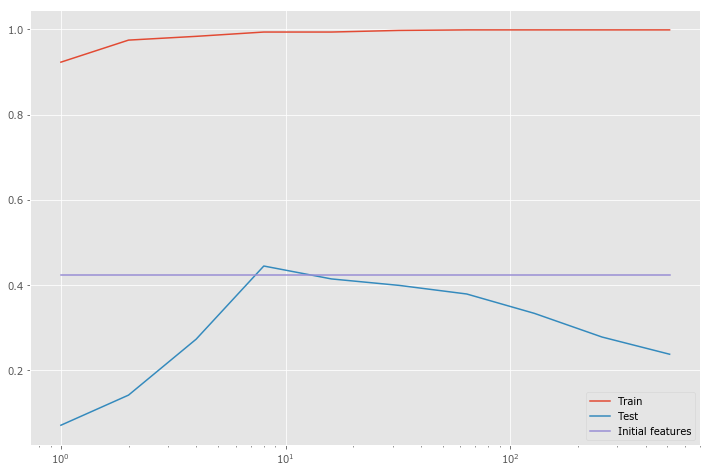

In [52]:
plt.plot(num_components, accuracy_train, label='Train');
plt.plot(num_components, accuracy_test, label='Test');
plt.plot(num_components, [accuracy_score(y_test, rf.predict(imgs_test))] * len(num_components) , label='Initial features');

plt.legend();
plt.xscale('log');

Ответьте на вопросы:
* Можно ли сказать, что случайный лес переобучается?
* Можно ли указать число компонент, при котором достигается максимальное качество на контроле? Сильно ли это значение отличается от качество на всех признаках?

**Ответы:**

* Да, случайный лес переобучается - в середине графика доля верных ответов на контроле начинает падать, хотя на тесте мы получаем 1.
* Да, наилучший результат мы получаем при 8 компонентах. Качество почти не отличается

In [53]:
num_components[np.argmax(accuracy_test)]

8

### Отбор признаков (0.5 балла код + 0.5 балла выводы)
* Обучите SelectKBest на обучающих данных. Он ранжирует признаки согласно статистическому тесту, оценивающему согласованность каждого признака с целевой переменной.
* Визуализруйте scores\_ как картинку 100x100.
* Оставьте 100 самых важных признаков и обучите на них логистическую регрессию. Выведите качество на контрольной выборке.

In [54]:
from sklearn.feature_selection import SelectKBest

In [55]:
skb = SelectKBest(k=100) # некоторые пиксели константные
skb.fit(imgs_train,y_train)

C:\Users\lenovo-15\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [   0    1    2 ... 9997 9998 9999] are constant.
  UserWarning)
C:\Users\lenovo-15\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=100, score_func=<function f_classif at 0x000001C0FEF1D510>)

(-0.5, 99.5, 99.5, -0.5)

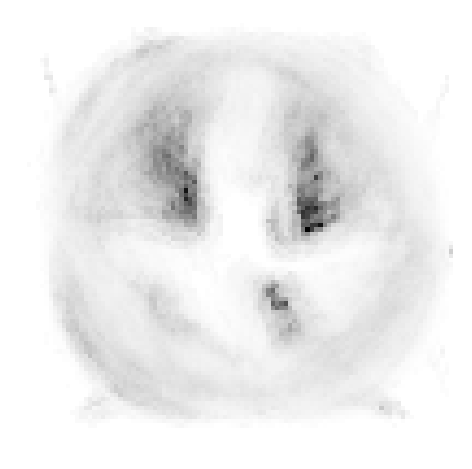

In [56]:
#skb.scores_ = np.nan_to_num(skb.scores_)
img = np.resize(skb.scores_,(100,100))
plt.imshow(img, cmap='Greys')
plt.grid(None)
plt.axis('off')

In [57]:
imgs_kbest_train = skb.transform(imgs_train)
imgs_kbest_test = skb.transform(imgs_test)

lr = LogisticRegression()
lr.fit(imgs_kbest_train, y_train)
print("Accuracy: ", accuracy_score(y_test, lr.predict(imgs_kbest_test)))

Accuracy:  0.050505050505050504


Ответьте на вопрос:
* Разумно ли предложенное алгоритмом ранжирование? Верно ли, что признаки, котореы он указал как неважные, действительно не помогают классифицировать листья?
* Сильно ли изменилось качество решения задачи после отбора признаков?

**Ответы:**

* Нет, не разумно. Он показывает как неважные те признаки, которые обычно важнее всего при классификации - пиксели вокруг центра. Именно они являются отличительной особенностью разных типов листьев
* Да, очень сильно упало.

## 5. Hyperparameters tuning
Наконец, пришло время настроить гиперпараметры модели и получить итоговое качество. В этом пункте мы возьмем табличные данные - те, которые открывали в самом начале. Это некие характеристики листьев, извлеченные из картинок. Будем считать это хорошим feature engineering'ом - как будто мы взяли и нагенерировли хороших признаков. Теперь настроим под них классификатор.

### Настройка гиперпараметров случайного леса (2 балла)
С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса

* Используйте `StratifiedKFold` на 4х фолдах (используйте только обучающую выборку). Мера качества - `accuracy`
* Примените оптимальную модель на контрольной выборке
* Для нескольких любых случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса.

In [58]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
rf = RandomForestClassifier(random_state=0,verbose=True)
depths = list(range(1,8))
depths.append(None)
#max_features = ['auto', 'sqrt']
depths.append(None)
#min_samples_split = [2, 5, 10]
param_grid = {'n_estimators' : list(range(100,1200,300)), 'max_depth' : depths} # не будем тюнить все для экономии времени
gs = GridSearchCV(rf, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv = StratifiedKFold(n_splits=4,random_state=0))

In [59]:
gs.fit(imgs_train, y_train)

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   13.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=0, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=True,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 400, 700, 1000], 'max_depth': [1, 2, 3, 4, 5, 6, 7, None, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [60]:
predicted_test = gs.best_estimator_.predict(imgs_test)

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Часто при решении задачи еще используется шестой шаг - композиции методов. Но в данном задании мы это пропустим :)

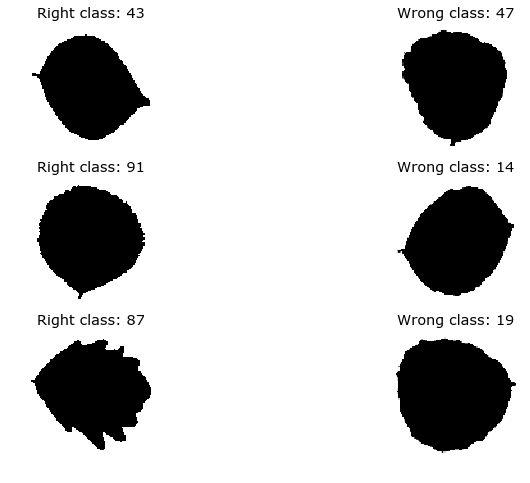

In [61]:
misclas_list = np.where(predicted_test!=y_test)[0]
for i in range(1,7,2):
    img_good = np.resize(imgs_test[misclas_list[i]], (100,100))
    img_bad = np.resize(image_list[table_data[table_data['label'] == predicted_test[misclas_list[i]]].iloc[0,:].id], (100,100))
    
    plt.subplot(3, 2, i)
    plt.imshow(img_good, cmap='Greys')
    plt.title('Right class: ' + str(y_test[misclas_list[i]]))
    plt.grid(None)
    plt.axis('off')
    
    plt.subplot(3, 2, i+1)
    plt.title('Wrong class: ' + str(predicted_test[misclas_list[i]]))
    plt.imshow(img_bad, cmap='Greys')
    plt.grid(None)
    plt.axis('off')

In [62]:
print("Accuracy score: ", accuracy_score(y_test, predicted_test))

Accuracy score:  0.6111111111111112


__Доп. задание (1-2 балла)__
Попробуйте придумать какие-нибудь признаки из сырых данных (картинок) или табличных и настроить на них случайный лес. Ваша цель - улучшить качество классификации по сравнению с исходными признаками.

In [72]:
# imgs_train_df = pd.DataFrame(imgs_train)
# imgs_test_df = pd.DataFrame(imgs_test)

# imgs_train_df['num_ones'] = np.sum(imgs_train_df, axis=0)
# imgs_test_df['num_ones'] = np.sum(imgs_test_df, axis=0)

# imgs_train_df['deviation'] = np.std(imgs_train_df, axis=0)
# imgs_test_df['deviation'] = np.std(imgs_test_df, axis=0)

# imgs_train_df['avg_pixel'] = np.mean(imgs_train_df, axis=0)
# imgs_test_df['avg_pixel'] = np.mean(imgs_test_df, axis=0)

# rf = RandomForestClassifier(max_depth=None, n_estimators=1000, random_state=0) # Используем найденные на GridSearch значения
# rf.fit(imgs_train_df, y_train)
# predicted_test = rf.predict(imgs_test_df)

# print("Accuracy score: ", accuracy_score(y_test, predicted_test))

# Не получилось :(